In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/processed_train_data.csv")

# Assuming dataset has 'text' and 'label' columns
texts = data['Text'].astype(str).values
labels = data['Label'].values

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Use TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()


vocab_size = X_train_vec.shape[1]

model = Sequential([
    Dense(128, input_dim=vocab_size, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    X_train_vec, y_train, validation_data=(X_test_vec, y_test),
    epochs=10, batch_size=32, verbose=1
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2396 - loss: 1.6010 - val_accuracy: 0.5591 - val_loss: 1.5621
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4055 - loss: 1.5402 - val_accuracy: 0.7586 - val_loss: 1.3917
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6125 - loss: 1.3158 - val_accuracy: 0.8645 - val_loss: 0.9471
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 0.8933 - val_accuracy: 0.9261 - val_loss: 0.5084
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8643 - loss: 0.5402 - val_accuracy: 0.9557 - val_loss: 0.2983
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9250 - loss: 0.3332 - val_accuracy: 0.9532 - val_loss: 0.2070
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9504 - loss: 0.2098 - val_accuracy: 0.9631 - val_loss: 0.1618
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9678 - loss: 0.1648 - val_accuracy: 0.9581 - val_loss

Train Accuracy: 0.9969, Train Loss: 0.0239
Test Accuracy: 0.9606, Test Loss: 0.1292


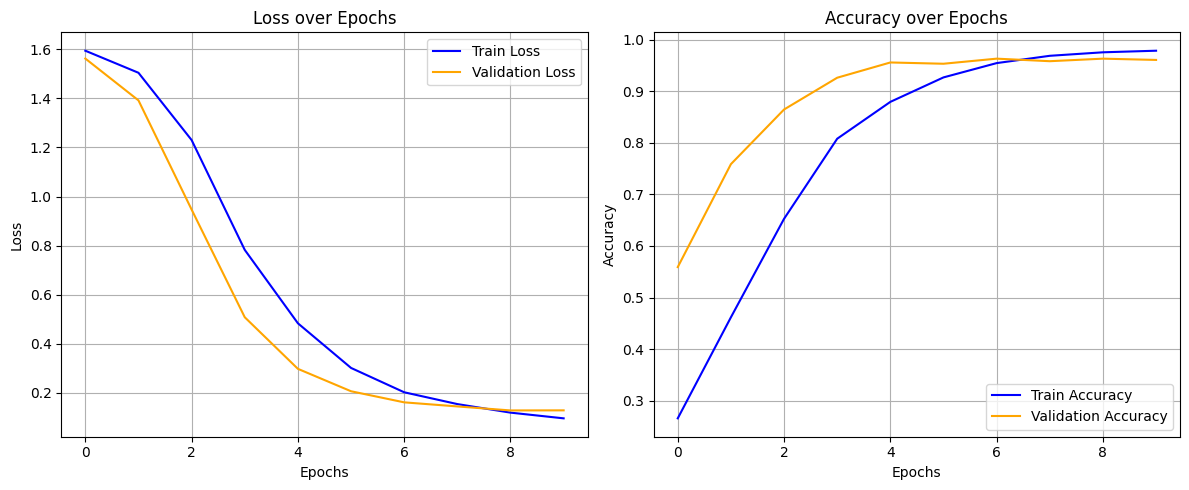

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


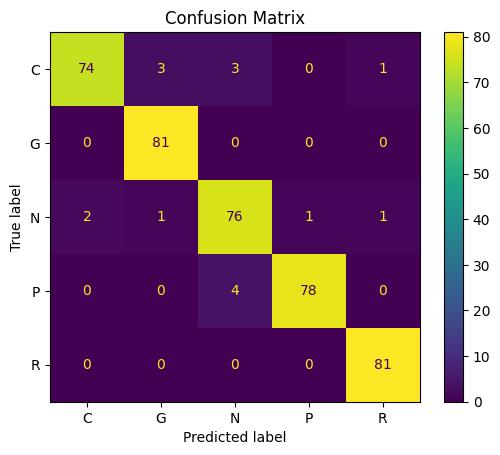

Macro F1 Score: 0.9604


<ipython-input-2-d8117f9d9b85>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


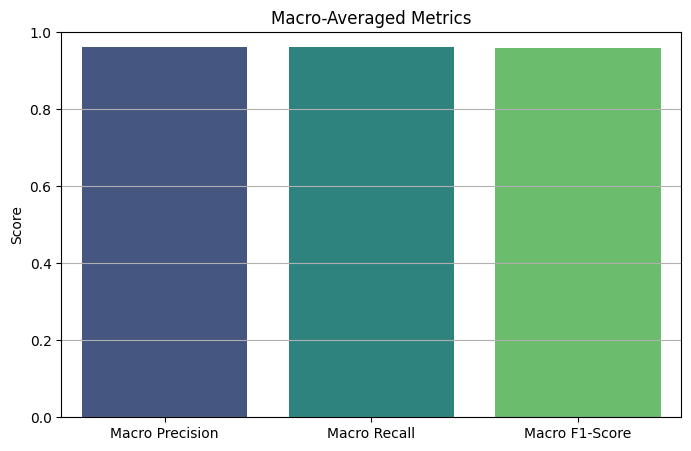

In [2]:
# Evaluate model
train_loss, train_acc = model.evaluate(X_train_vec, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_vec, y_test, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Predictions
y_pred = model.predict(X_test_vec)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
display.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

# Macro-Averaged Metrics
macro_precision, macro_recall, macro_f1_r, _ = precision_recall_fscore_support(
    y_test, y_pred_labels, average="macro"
)

# Print Macro F1 Score
print(f"Macro F1 Score: {macro_f1_r:.4f}")

# Plot Macro-Averaged Metrics
metrics = ["Macro Precision", "Macro Recall", "Macro F1-Score"]
values = [macro_precision, macro_recall, macro_f1_r]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title("Macro-Averaged Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()




In [4]:
# Path to the test data (CSV file)
test_file_path = '/content/drive/MyDrive/processed_test_data.csv'

# Read test data
test_data = pd.read_csv(test_file_path)

# Preprocess test data
X_test_final = vectorizer.transform(test_data['Transcript'])  # Assuming 'text' is the column with input data

# Predict using the trained BiLSTM model
y_test_pred_probs = model.predict(X_test_final)
y_test_pred_labels = np.argmax(y_test_pred_probs, axis=1)

# Map predictions back to original labels
test_data['CNN Predictions'] = label_encoder.inverse_transform(y_test_pred_labels)

# Save the predictions to a CSV file
output_csv_path = '/content/drive/MyDrive/tfidf_CNN_predictions.csv'
test_data.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"Predictions saved to {output_csv_path}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
Predictions saved to /content/drive/MyDrive/tfidf_CNN_predictions.csv
